# Decision Tree Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [3]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [7]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [8]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [9]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [12]:
print(X_test)

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 

## Training the Decision Tree Classification model on the Training set

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting a new result (test)

In [14]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [15]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[62  6]
 [ 3 29]]


0.91

## Visualising the Training set results

C:\Users\sunny_weng\AppData\Local\Temp\ipykernel_50192\3994810617.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


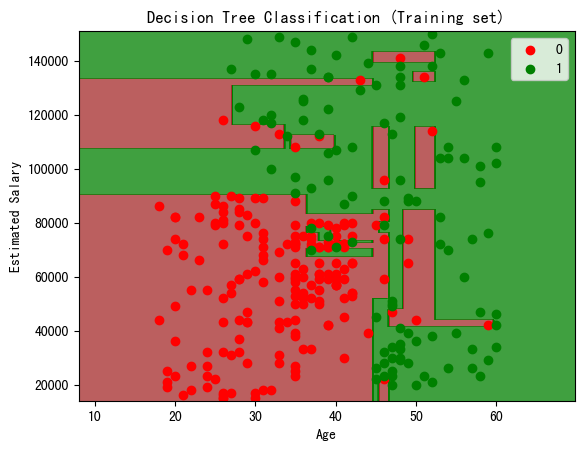

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('brown', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

C:\Users\sunny_weng\AppData\Local\Temp\ipykernel_50192\712449144.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


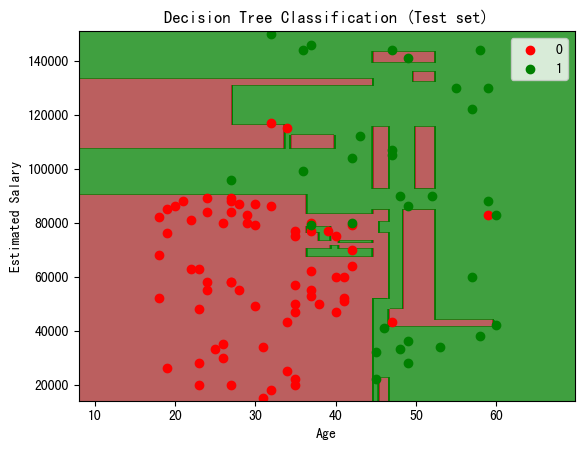

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('brown', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## decision tree 中的可調參數

[sklearn decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

- criterion: string, optional (default=”gini”): : 衡量分割品質的函數。支援的標準有"Gini 不純度"和"信息增益"
- splitter: string, optional (default=”best”)
- max_depth: int or None, optional (default=None)
- min_samples_split: int, float, optional (default=2)

## criterion

衡量分割品質的函數。支援的標準有"Gini 不純度"和"信息增益"。預設是"gini"。

如果你曾經想過決策樹節點是如何分割的，那就是使用不純度。不純度是衡量節點上標籤同質性的指標。有許多方法可以實現不純度的衡量，scikit-learn 實現了信息增益和 Gini 不純度或 Gini 指數的兩種方法。


根據論文[《基尼指數和信息增益準則的理論比較》](https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf)研究指出，基尼指數和信息增益的一致性/不一致性頻率僅為所有情況的 2％，因此在實際上您可以使用其中任何一個，唯一的區別是熵可能稍微慢一些，因為它需要計算對數函數：

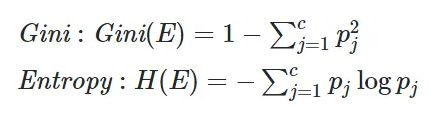

In [19]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# 生成一個大型的分類數據集
X, y = make_classification(n_samples=100000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# 分割數據為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 建立並訓練使用基尼指數的決策樹模型
start = time.time()
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)
gini_time = time.time() - start
gini_accuracy = accuracy_score(y_test, dt_gini.predict(X_test))

# 建立並訓練使用信息增益的決策樹模型
start = time.time()
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)
entropy_time = time.time() - start
entropy_accuracy = accuracy_score(y_test, dt_entropy.predict(X_test))

# 輸出結果
print(f"Gini 不純度 - 訓練時間: {gini_time:.4f}秒, 測試準確度: {gini_accuracy:.4f}")
print(f"信息增益 - 訓練時間: {entropy_time:.4f}秒, 測試準確度: {entropy_accuracy:.4f}")


Gini 不純度 - 訓練時間: 1.7644秒, 測試準確度: 0.8987
信息增益 - 訓練時間: 1.7770秒, 測試準確度: 0.9034


## splitter

用於選擇每個節點的分割策略。支持的策略有“best”表示選擇最佳分割，“random”表示選擇最佳隨機分割。默認為“best”。

假設你有數百個特徵，那麼「最佳」的分割器是理想的，因為它會根據不純度度量計算最佳特徵進行分割，而如果你選擇「隨機」，你很有可能得到不提供太多信息的特徵，這將導致更深、不太精確的樹。

另一方面，「隨機」分割器具有一些優勢，特別是因為它隨機選擇一組特徵進行分割，所以不需要計算最佳分割的計算負擔。此外，它也不容易過度擬合，因為你不是在每次分割之前計算最佳分割，額外的隨機性將對你有所幫助，所以如果你的模型過度擬合，你可以將分割器更改為「隨機」並重新訓練。

In [20]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 生成數據集
X, y = make_classification(n_samples=100000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# 分割數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 創建兩個決策樹模型
tree_best = DecisionTreeClassifier(splitter='best', max_depth=5, random_state=42)
tree_random = DecisionTreeClassifier(splitter='random', max_depth=5, random_state=42)

# 訓練模型
tree_best.fit(X_train, y_train)
tree_random.fit(X_train, y_train)

# 計算Gini不純度的函數
def calculate_total_gini_impurity(model, X, y):
    # 使用模型的apply方法獲得每個樣本的葉節點索引
    leaf_indices = model.apply(X)
    total_gini = 0
    # 對每個葉節點，計算其Gini不純度
    for leaf_index in np.unique(leaf_indices):
        # 獲取該葉節點的樣本索引
        leaf_condition = leaf_indices == leaf_index
        # 獲取該葉節點的樣本標籤
        labels = y[leaf_condition]
        # 計算Gini不純度
        _, counts = np.unique(labels, return_counts=True)
        prob = counts / counts.sum()
        leaf_gini = 1 - np.sum(prob**2)
        total_gini += leaf_gini * len(labels)
    return total_gini / len(X)

# 計算並比較Gini不純度
gini_best = calculate_total_gini_impurity(tree_best, X_test, y_test)
gini_random = calculate_total_gini_impurity(tree_random, X_test, y_test)

print(f"Total Gini Impurity with 'best': {gini_best}")
print(f"Total Gini Impurity with 'random': {gini_random}")


Total Gini Impurity with 'best': 0.2753679172879682
Total Gini Impurity with 'random': 0.339077946773113


## max_depth

一般來說，您允許樹生長得越深，模型就會變得越複雜，因為您會有更多的分割點，並且它能夠捕捉更多關於數據的信息，這是決策樹過度擬合的根本原因之一，因為您的模型對於訓練數據完美擬合，但在測試集上無法很好地泛化。因此，如果您的模型過度擬合，減少 max_depth 是一種對抗過度擬合的方法。

同樣，深度過低也是不好的，因為您的模型會出現欠擬合的情況，所以如何找到最佳值，需要進行實驗，因為過度擬合和欠擬合對於數據集來說是非常主觀的，沒有一個值適用於所有情況的解決方案。所以我通常的做法是，讓模型先決定 max_depth，然後通過比較訓練和測試分數來檢查過度擬合或欠擬合的情況，根據程度減少或增加 max_depth。

## min_samples_split

分割內部節點所需的最小樣本數。這可以是整數或浮點數。<br>
- 如果是整數，則將min_samples_split作為最小數量。<br>
- 如果是浮點數，如果是浮點數，則 min_samples_split 是一個分數，並且 ceil(min_samples_split * n_samples) 是每個分割所需的最小樣本數。<br>


注意: 假設你指定了一個 min_samples_split，並且結果分割出的葉子節點只有一個樣本，而你指定的 min_samples_leaf 是 2，那麼你的 min_samples_split 將不被允許。

## min_samples_leaf

1-20 最佳數字

在葉子節點所需的最小樣本數。只有在每個左右分支中至少有 min_samples_leaf 個訓練樣本時，才會考慮任何深度的分割點。這可能會使模型平滑化，特別是在回歸中。<br>

- 如果是 int，則將 min_samples_leaf 視為最小數量。<br>
- 如果是浮點數，則 min_samples_leaf 是一個分數，ceil(min_samples_leaf * n_samples) 是每個節點的最小樣本數。<br>

與 min_samples_split 類似，min_samples_leaf 也用於通過定義每個葉子至少有一個元素來控制過度擬合。從而確保樹不能通過為每個樣本創建一堆小分支來過度擬合訓練數據集。

根據 [An empirical study on hyperparameter tuning of decision trees](https://arxiv.org/abs/1812.02207) 的論文還指出，對於 CART 算法，理想的 min_samples_leaf 值通常在 1 到 20 之間。該論文還指出，min_samples_split 和 min_samples_leaf 在相對重要性分析中對最終樹的性能負責性最大




## class_weight

以{class_label: weight}形式給出的類別權重。如果未給出，則假定所有類別的權重均為 1。對於多輸出問題，可以按照 y 的列的相同順序提供一個 dict 列表。

當您擁有一個不平衡的數據集時，這非常有用。通常，您可以將類別的分佈作為類別權重的起點，然後根據決策樹的傾向，嘗試增加或減少其他類別的權重，以使算法相對於其他類別的樣本進行懲罰。最簡單的方法是指定“balanced”，然後根據需要使用自定義權重。